In [11]:
import pandas as pd
import numpy as np

data=pd.read_csv("C:\\Users\\Administrator\\Desktop\\毕业设计\\航空数据清洗\\airport_gz_security_check_clean67.csv")
data

,passenger_ID,security_time,flight_ID
0,H_CZ1321*045*10SEP16,2016/9/10 4:23,CZ1321
1,AQ1055*002*10SEP16,2016/9/10 4:30,AQ1055
2,ZH9613*027*10SEP16,2016/9/10 4:30,ZH9613
3,ZH9615*028*10SEP16,2016/9/10 4:30,ZH9615
4,HO1078*046*10SEP16,2016/9/10 4:30,HO1078
...,...,...,...
300735,H_CA1829*033*14SEP16,2016/9/14 14:59,CA1829
300736,MU5216*056*14SEP16,2016/9/14 14:59,MU5216
300737,ZH9597*110*14SEP16,2016/9/14 14:59,ZH9597
300738,HU7361*006*14SEP16,2016/9/14 14:59,HU7361


# 特征构建

In [12]:
# 转换时间字段为日期时间类型
data['security_time'] = pd.to_datetime(data['security_time'])
# 将时间字段设置为索引
data.set_index('security_time', inplace=True)
# 按天和小时统计人数
counts = data.groupby([data.index.date,data.index.hour]).size()
# 创建新的数据框
result = pd.DataFrame(counts, columns=['passenger_ID'])
result.reset_index(inplace=True)
result.columns = ['date','hour','passenger_count']
max = result['passenger_count'].max()
min = result['passenger_count'].min()
print(max,min)

# 转换为str类型拼接
result['date'] = result['date'].astype(str)
result['hour'] = result['hour'].astype(str)
result['day'] = result['date'] + '   ' + result['hour'] + ':00'
result['day'] = pd.to_datetime(result['day'])

from sklearn.preprocessing import MinMaxScaler
# 创建MinMaxScaler对象
scaler = MinMaxScaler()
# 假设数据集为data，其中"passenger_count"字段位于第列
passenger_count_data = result['passenger_count'].values.reshape(-1, 1)
# 对"passenger_count"字段进行归一化
normalized_data = scaler.fit_transform(passenger_count_data)
# 将归一化后的数据更新到原始数据集
result['passenger_count_normalized'] = normalized_data

# 删除包含NaN值的行（可选）
result

6308 1


,date,hour,passenger_count,day,passenger_count_normalized
0,2016-09-10,4,164,2016-09-10 04:00:00,0.025844
1,2016-09-10,5,4367,2016-09-10 05:00:00,0.692247
2,2016-09-10,6,5947,2016-09-10 06:00:00,0.942762
3,2016-09-10,7,5242,2016-09-10 07:00:00,0.830981
4,2016-09-10,8,4180,2016-09-10 08:00:00,0.662597
...,...,...,...,...,...
93,2016-09-14,10,3929,2016-09-14 10:00:00,0.622800
94,2016-09-14,11,4116,2016-09-14 11:00:00,0.652450
95,2016-09-14,12,3913,2016-09-14 12:00:00,0.620263
96,2016-09-14,13,3355,2016-09-14 13:00:00,0.531790


# 数据验证

# 自相关图

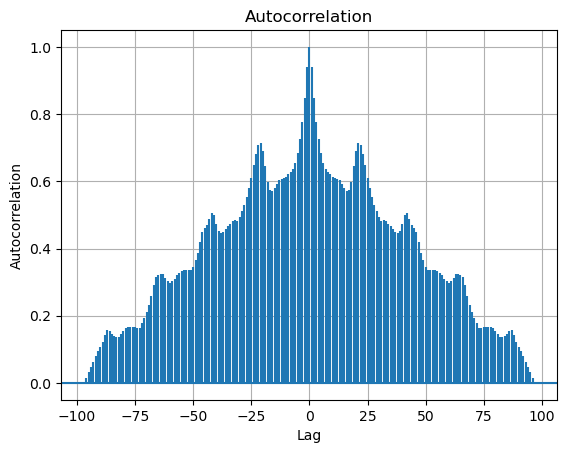

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设您已经有一个包含时间序列数据的DataFrame，其中一列是您要分析的数据列
# 计算数据列的自相关系数
autocorr = result['passenger_count_normalized'].autocorr()

# 绘制自相关图
plt.acorr(result['passenger_count_normalized'], maxlags=len(result)-1)
plt.title('Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# 平稳性检验图

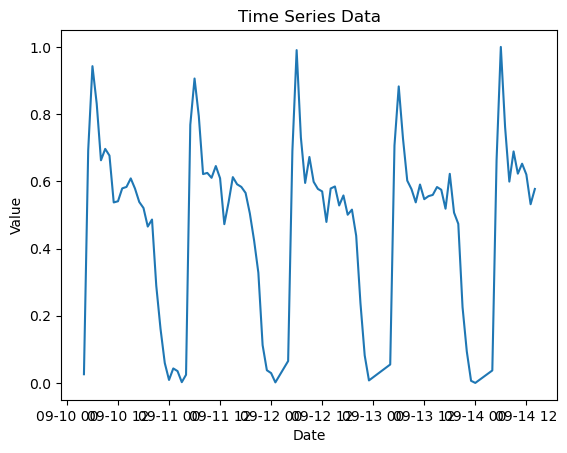

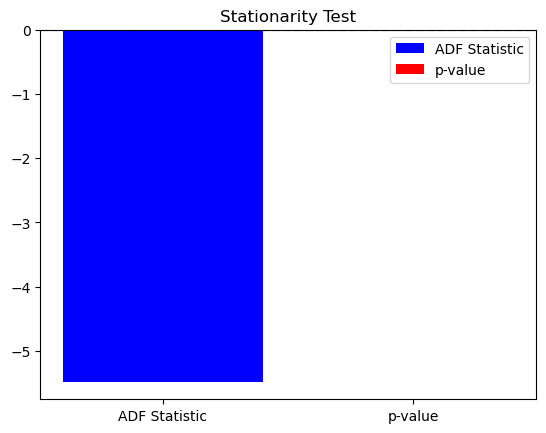

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# 绘制时间序列图
plt.plot(result['day'], result['passenger_count_normalized'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()

# 进行平稳性检验
result1 = adfuller(result['passenger_count_normalized'])

# 提取统计量和p-value
adf_statistic = result1[0]
p_value = result1[1]

# 绘制平稳性检验图
plt.bar(['ADF Statistic'], [adf_statistic], color='blue', label='ADF Statistic')
plt.bar(['p-value'], [p_value], color='red', label='p-value')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('Stationarity Test')
plt.show()

# 白噪声检验绘图

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,53.670301,2.371207e-13,52.060192,5.382512e-13
2,67.195048,2.563190e-15,65.043949,7.514255e-15
3,68.789006,7.754215e-15,66.558210,2.328055e-14
4,68.918241,3.839920e-14,66.679690,1.138905e-13
5,71.884877,4.151143e-14,69.438662,1.341008e-13
...,...,...,...,...
92,441.890926,3.613322e-47,289.223320,3.070956e-22
93,442.083473,7.376069e-47,289.232947,5.468679e-22
94,442.084038,1.616717e-46,289.232970,9.718169e-22
95,442.093201,3.512655e-46,289.233245,1.717611e-21


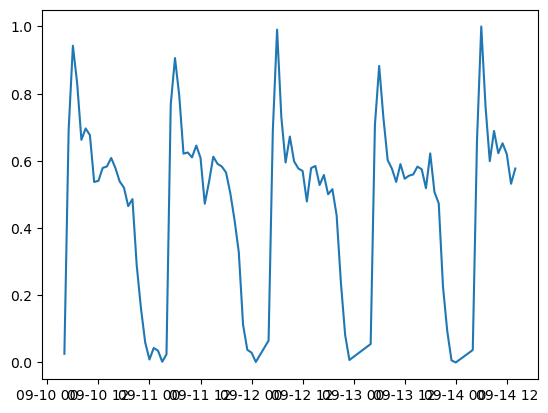

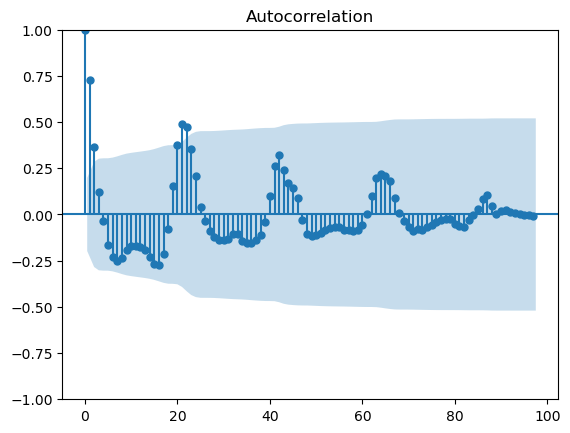

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
plt.plot(result['day'],result['passenger_count_normalized'])
plot_acf(result['passenger_count_normalized'],lags=97)
acorr_ljungbox(result['passenger_count_normalized'], lags = [i for i in range(1,97)],boxpierce=True)


# ARIMA模型


In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# 拟合模型
p = 72
q = 36
model = ARIMA(result['passenger_count_normalized'], order=(p, 0, q))
model_fit = model.fit()

# 执行一步预测
result['predict'] = model_fit.predict(start=0, end=len(result), dynamic=False)
forecast = model_fit.get_forecast(steps=3*24)  # 预测4天（每天24小时）
predicted_values = forecast.predicted_mean

# 从'2016-09-10 5:00:00'开始生成长度为5的日期时间索引，间隔为1时
date_index = pd.date_range(start='2016-09-10 5:00:00', periods=72, freq='H')
df = pd.DataFrame({'Predicted Date': date_index, 'Predicted Values': predicted_values})
df

D:\study\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
D:\study\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Predicted Date,Predicted Values
98,2016-09-10 05:00:00,0.753439
99,2016-09-10 06:00:00,0.903693
100,2016-09-10 07:00:00,0.756881
101,2016-09-10 08:00:00,0.642731
102,2016-09-10 09:00:00,0.630869
...,...,...
165,2016-09-13 00:00:00,0.492472
166,2016-09-13 01:00:00,0.650907
167,2016-09-13 02:00:00,0.622241
168,2016-09-13 03:00:00,0.607776


# 图像显示

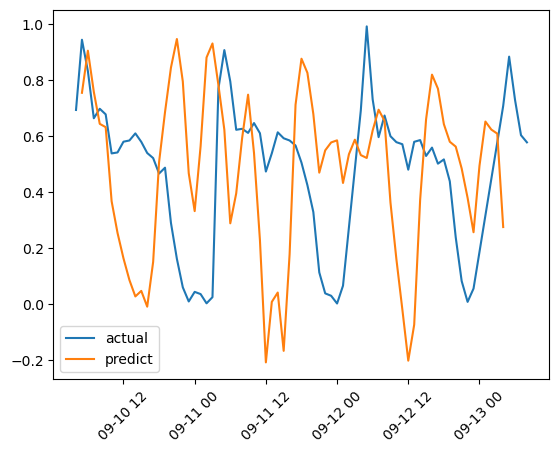

In [4]:
from sklearn import metrics
import matplotlib.pyplot as plt

# 绘图显示结果
plt.plot(result['day_lag1'][:72],result['passenger_count_normalized'][:72], label='actual')
plt.plot(df['Predicted Date'],df['Predicted Values'], label='predict')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 模型评估

In [29]:
# MAE平均差异
t_val = np.array(result['passenger_count_normalized'][1:73])
p_val = np.array(df['Predicted Values'])

MAE=metrics.mean_absolute_error(t_val,p_val)
print("预测与实际值之间的平均差异:",MAE)

# 计算均方根误差（RMSE）
RMSE = np.sqrt(metrics.mean_squared_error(t_val, p_val))
print("均方根误差（RMSE）:", RMSE)

# 计算决定系数（R-squared）
R_squared = metrics.r2_score(t_val, p_val)
print("决定系数（R-squared）:", R_squared)

预测与实际值之间的平均差异: 0.3595812989239495
均方根误差（RMSE）: 0.43535242558423315
决定系数（R-squared）: -1.9291481339369314


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6624\674395540.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  t_val = np.array(result['passenger_count_normalized'][1:97])


# Prophet模型

In [36]:
import pandas as pd
from prophet import Prophet


df = result.rename(columns={'day': 'ds','passenger_count_normalized': 'y'})
# 创建并拟合Prophet模型
model = Prophet()
model.fit(df)

# 预测未来4天每小时客流量
future = model.make_future_dataframe(periods=4*24, freq='H')
forecast = model.predict(future)

# 打印预测结果
forecast = forecast[['yhat']]
df = pd.DataFrame(forecast)
df = df.rename(columns={'yhat': 'Predicted Values'})
df

17:52:51 - cmdstanpy - INFO - Chain [1] start processing
17:52:51 - cmdstanpy - INFO - Chain [1] done processing


,Predicted Values
0,0.617876
1,0.833037
2,0.862609
3,0.752811
4,0.625058
...,...
188,0.491265
189,0.514654
190,0.546581
191,0.532781


# 图像显示

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6624\3893386100.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(result['day_lag1'][1:97],result['passenger_count_normalized'][1:97], label='actual')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6624\3893386100.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(result['day_lag1'][1:97], df['Predicted Values'][0:96], label='predict')


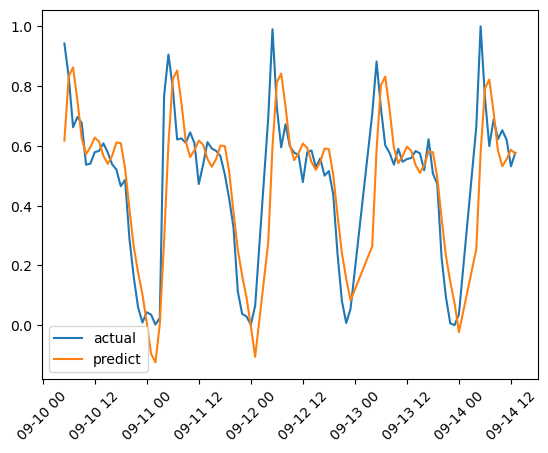

In [37]:
from sklearn import metrics
# 绘图显示结果
plt.plot(result['day_lag1'][1:97],result['passenger_count_normalized'][1:97], label='actual')
plt.plot(result['day_lag1'][1:97], df['Predicted Values'][0:96], label='predict')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 模型评估

In [38]:
t_val = np.array(result['passenger_count_normalized'][:72])
p_val = np.array(df['Predicted Values'][:72])


# MAE平均差异
MAE=metrics.mean_absolute_error(t_val,p_val)
print("预测与实际值之间的平均差异:",MAE)

# 计算均方根误差（RMSE）
RMSE = np.sqrt(metrics.mean_squared_error(t_val, p_val))
print("均方根误差（RMSE）:", RMSE)

# 计算决定系数（R-squared）
R_squared = metrics.r2_score(t_val, p_val)
print("决定系数（R-squared）:", R_squared)

预测与实际值之间的平均差异: 0.07082306266911467
均方根误差（RMSE）: 0.08895781348818263
决定系数（R-squared）: 0.8813609466455833


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6624\2130545835.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  t_val = np.array(result['passenger_count_normalized'][:72])


# 线性回归模型

In [88]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta



# 创建特征矩阵 X 和目标向量 y
x = result[['hour']]
y = result['passenger_count_normalized']
z =  result['hour'][0:72]

param_grid = {'fit_intercept': True, 'normalize': True}

# 将特征数据X转换为二维数组
x = x.values.reshape(-1, 1)

# 拟合线性回归模型
model = LinearRegression()

model.fit(x,y)

# 创建一个包含未来5天每小时日期的数据框
future_dates = pd.date_range(start='2016-09-10 5:00:00', periods=72, freq='H')

# 将日期转换为小时
future_hours = result['hour'][0:72]
future_hours = np.array(future_hours)

# 预测客流量
predictions = model.predict(future_hours.reshape(-1, 1))

df = pd.DataFrame({'Predicted Values': predictions})
df

,Predicted Values
0,0.524794
1,0.520056
2,0.515318
3,0.510581
4,0.505843
...,...
67,0.520056
68,0.515318
69,0.510581
70,0.505843


# 图像显示

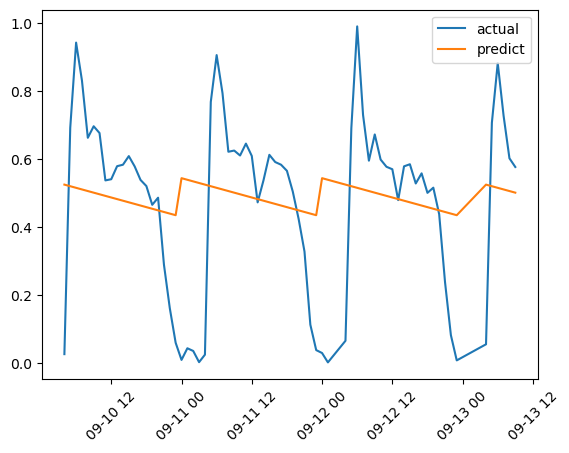

In [89]:
from sklearn import metrics
import matplotlib.pyplot as plt
# 绘图显示结果
plt.plot(result['day'][0:72],result['passenger_count_normalized'][0:72], label='actual')
plt.plot(result['day'][0:72], df['Predicted Values'], label='predict')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 模型评估

In [90]:
t_val = np.array(result['passenger_count_normalized'][:72])
p_val = np.array(df['Predicted Values'][:72])


# MAE平均差异
MAE=metrics.mean_absolute_error(t_val,p_val)
print("预测与实际值之间的平均差异:",MAE)

# 计算均方根误差（RMSE）
RMSE = np.sqrt(metrics.mean_squared_error(t_val, p_val))
print("均方根误差（RMSE）:", RMSE)

# 计算决定系数（R-squared）
R_squared = metrics.r2_score(t_val, p_val)
print("决定系数（R-squared）:", R_squared)

预测与实际值之间的平均差异: 0.2066665683846283
均方根误差（RMSE）: 0.26288924478380743
决定系数（R-squared）: 0.006508215770128056


# 最优模型预测

In [5]:
import pandas as pd
from prophet import Prophet


df = result.rename(columns={'day': 'ds','passenger_count': 'y'})
# 创建并拟合Prophet模型
model = Prophet()
model.fit(df)

# 预测未来4天每小时客流量
future = model.make_future_dataframe(periods=4*24, freq='H')
forecast = model.predict(future)

# 打印预测结果
forecast = forecast[['yhat']][:96]
df = pd.DataFrame(forecast)
df = df.rename(columns={'yhat': 'Predicted Values'})
df

11:23:00 - cmdstanpy - INFO - Chain [1] start processing
11:23:00 - cmdstanpy - INFO - Chain [1] done processing


,Predicted Values
0,1644.698816
1,3750.362682
2,5194.780965
3,5433.560855
4,4739.928789
...,...
91,4555.536138
92,3720.471300
93,3371.660473
94,3528.034233


In [10]:
# 从'2016-09-10 5:00:00'开始生成长度为5的日期时间索引，间隔为1时
date_index = pd.date_range(start='2016-09-14 14:00:00', periods=96, freq='H')
df = pd.DataFrame({'Predicted Date': date_index, 'Predicted Values': df['Predicted Values']})
df.to_csv("C:\\Users\\Administrator\\Desktop\\毕业设计\\predict_four.csv")

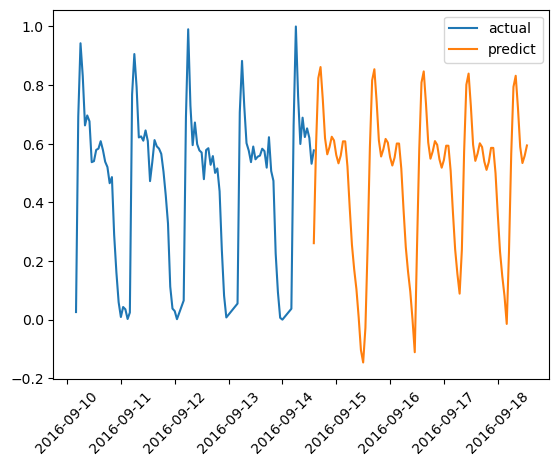

In [37]:
from sklearn import metrics
import matplotlib.pyplot as plt
# 绘图显示结果
plt.plot(result['day'],result['passenger_count_normalized'], label='actual')
plt.plot(df['Predicted Date'], df['Predicted Values'], label='predict')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [38]:
t_val = np.array(result['passenger_count_normalized'][1:97])
p_val = np.array(df['Predicted Values'])


# MAE平均差异
MAE=metrics.mean_absolute_error(t_val,p_val)
print("预测与实际值之间的平均差异:",MAE)

# 计算均方根误差（RMSE）
RMSE = np.sqrt(metrics.mean_squared_error(t_val, p_val))
print("均方根误差（RMSE）:", RMSE)

# 计算决定系数（R-squared）
R_squared = metrics.r2_score(t_val, p_val)
print("决定系数（R-squared）:", R_squared)

预测与实际值之间的平均差异: 0.1121923522948833
均方根误差（RMSE）: 0.1625592553954269
决定系数（R-squared）: 0.5937844296464609


In [3]:
import pandas as pd

data=pd.read_csv("C:\\Users\\Administrator\\Desktop\\1.csv")

# 按天和小时统计人数
counts = data.groupby([data['WIFIAPTag']]).size()
# 创建新的数据框
result = pd.DataFrame(counts, columns=['passenger_ID'])
result

,passenger_ID
WIFIAPTag,
E1-1A-1<E1-1-01>,1400
E1-1A-2<E1-1-02>,1400
E1-1A-3<E1-1-03>,1400
E1-1A-4<E1-1-04>,1400
E1-1A-5<E1-1-05>,1400
...,...
WC-3G<WC-3G-05>,1399
WC-3G<WC-3G-06>,1399
WC-3G<WC-3G-07>,1399


In [7]:
print(result[:20])

                  passenger_ID
WIFIAPTag                     
E1-1A-1<E1-1-01>          1400
E1-1A-2<E1-1-02>          1400
E1-1A-3<E1-1-03>          1400
E1-1A-4<E1-1-04>          1400
E1-1A-5<E1-1-05>          1400
E1-1A-6<E1-1-06>          1400
E1-2A<E1-2-07>            1400
E1-2A<E1-2-09>            1400
E1-2A<E1-2-10>            1400
E1-2A<E1-2-11>            1400
E1-2A<E1-2A-02>           1400
E1-2A<E1-2A-06>           1400
E1-2B<E1-2-04>            1400
E1-2B<E1-2B-02>           1400
E1-2B<E1-2B-03>           1400
E1-2C<E1-2-02>            1400
E1-2C<E1-2-03>            1400
E1-2C<E1-2C-01>           1400
E1-3A<E1-3-01>            1400
E1-3A<E1-3-02>            1400
